<a href="https://colab.research.google.com/github/yanamushka/ML-course/blob/main/HW_2_2_%D0%9F%D0%BE%D0%BB%D1%96%D0%BD%D0%BE%D0%BC%D1%96%D0%B0%D0%BB%D1%8C%D0%BD%D1%96_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8_Pipelines_ipynbn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [1]:
!pip install opendatasets --upgrade --quiet

In [81]:
import opendatasets as od
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, root_mean_squared_error
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import seaborn as sns
import joblib


In [8]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2/data'

In [9]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yanamushka
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 34.3MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under ROC score on train dataset: 0.74%


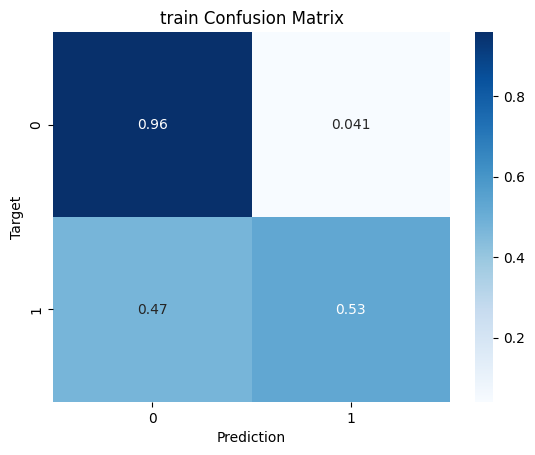

Area under ROC score on val dataset: 0.75%


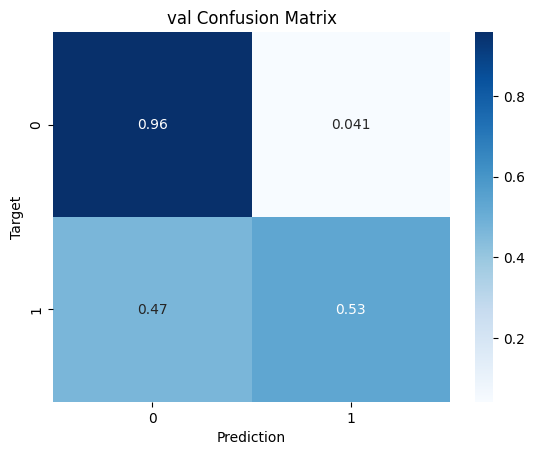

['bank_customer_pipeline']

In [34]:
raw_df = pd.read_csv('/content/bank-customer-churn-prediction-dlu-course-c-2/train.csv', index_col=0)

train_df, val_df = train_test_split(raw_df, test_size = 0.25, random_state = 42)

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[3:-1]
target_col = ['Exited']
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include='number').columns
categorical_cols = train_inputs.select_dtypes(exclude='number').columns

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression())
])

# Тренуємо пайплайн
model_pipeline.fit(train_inputs, train_targets)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    preds = model_pipeline.predict(inputs)
    roc_auc = roc_auc_score(targets, preds)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize ='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, train_inputs, train_targets, 'train')
val_preds = predict_and_plot(model_pipeline, val_inputs, val_targets, 'val')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'bank_customer_pipeline')


**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

In [42]:
def polinom_train(degree:int, numeric_cols, categorical_cols, inputs, targets, name=''):
  new_numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
     ('polinomial', PolynomialFeatures(degree=degree))
  ])
  new_preprocessor = ColumnTransformer(transformers = [
    ('num', new_numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
  ])

  new_pipeline = Pipeline(steps = [('new_preprocessor', new_preprocessor),
                                 ('classifier', LogisticRegression(max_iter = 10000))])

  new_pipeline.fit(train_inputs, train_targets)
  return predict_and_plot(new_pipeline, inputs, targets, name)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under ROC score on Train polinom 2 dataset: 0.78%


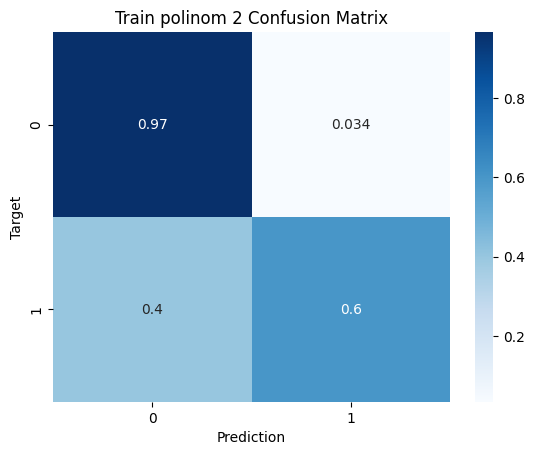

array([0., 0., 0., ..., 0., 0., 1.])

In [46]:
polinom_train(2, numeric_cols, categorical_cols, train_inputs, train_targets, 'Train polinom 2')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under ROC score on Validation polinom 2 dataset: 0.77%


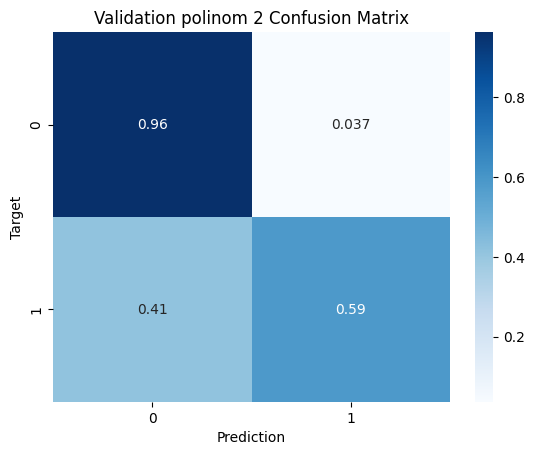

array([0., 1., 0., ..., 1., 1., 0.])

In [47]:
polinom_train(2, numeric_cols, categorical_cols, val_inputs, val_targets, 'Validation polinom 2')

Бачимо, що показники моделі покращились як для тренувального так і для валідаційного набору, хоча на валідаційному наборі ркзультат трішки гірший не можемо з впевненістю сказати чи присутнє перенавчання моделі

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under ROC score on Train polynom 4 dataset: 0.82%


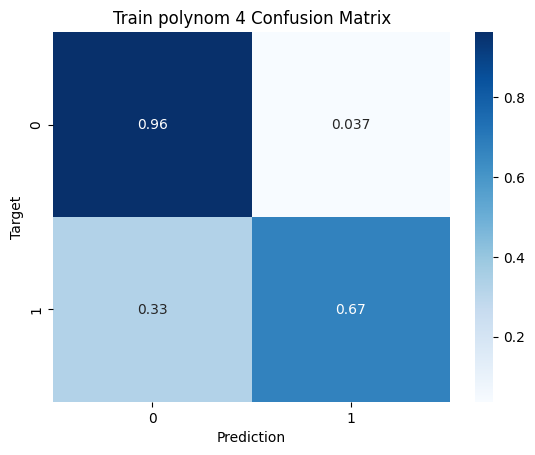

array([0., 0., 0., ..., 0., 0., 1.])

In [44]:
polinom_train(4, numeric_cols, categorical_cols, train_inputs, train_targets, 'Train polynom 4')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under ROC score on Validation polinom 4 dataset: 0.80%


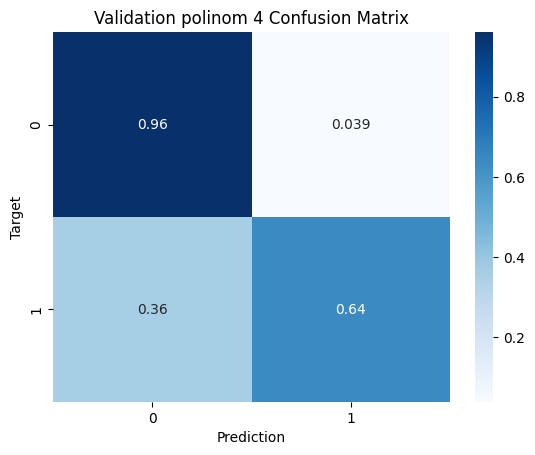

array([0., 1., 0., ..., 1., 1., 0.])

In [45]:
polinom_train(4, numeric_cols, categorical_cols, val_inputs, val_targets, 'Validation polinom 4')

Бачимо, що при генеруванні поліноміальних ознак до 4 степені результат в порівнянні з початковим значно покращився, але знову ж спостерігаємо гірший результат для валідаційного набору, що може свідчити про перенавчання

**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [40]:
reg_data = pd.read_csv('/content/regression_data.csv')

In [62]:
reg_input = list(reg_data.columns)[:5]

In [65]:
reg_target = ['target']

In [41]:
train_reg_data, test_reg_data = train_test_split(reg_data, test_size = 0.2, random_state = 42)

In [71]:
train_reg_inputs = train_reg_data[reg_input]
train_reg_targets = train_reg_data[reg_target]
test_reg_inputs = test_reg_data[reg_input]
test_reg_targets = test_reg_data[reg_target]

In [74]:
poly_features = PolynomialFeatures(degree=5)

In [75]:
train_reg_poly_input = poly_features.fit_transform(train_reg_inputs)
test_reg_poly_input = poly_features.fit_transform(test_reg_inputs)

In [72]:
model_reg = LinearRegression()

In [82]:
model_reg.fit(train_reg_poly_input, train_reg_targets)
target_predict_train = model_reg.predict(train_reg_poly_input)
target_predict_test = model_reg.predict(test_reg_poly_input)
rmse_train = root_mean_squared_error(train_reg_targets, target_predict_train)
rmse_test = root_mean_squared_error(test_reg_targets, target_predict_test)
print(f'RMSE train: {rmse_train}')
print(f'RMSE test: {rmse_test}')


RMSE train: 7.20617564659412e-13
RMSE test: 29.43349652599358


In [83]:
reg_data.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,-0.082039,-0.017872,0.092293,-0.076084,0.053098,-3.902984
std,0.941214,1.065887,0.978557,0.910588,1.004498,45.466621
min,-3.241267,-2.619745,-1.913280,-2.211135,-2.301921,-111.753810
25%,-0.699726,-0.756351,-0.553649,-0.730367,-0.772825,-37.339533
50%,-0.066080,-0.161286,0.120296,0.018418,0.013002,-0.641298
75%,0.529804,0.679598,0.624120,0.519347,0.787085,25.464414
max,2.122156,3.852731,3.078881,2.314659,2.075401,115.125907


Для тренувального набору даних модель показує хороший результат, проте для тестового набору помилка моделі значно більша, що свідчить про перенавчання

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [101]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
models = [
    Ridge(),
    Lasso(),
    Lasso(alpha = 0.01),
    ElasticNet()
]

In [97]:
? Lasso

In [90]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  train_metrics = root_mean_squared_error(y_train, y_train_pred)
  test_metrics = root_mean_squared_error(y_test, y_test_pred)
  return dict(train = train_metrics, test = test_metrics)

In [88]:
poly_features_20 = PolynomialFeatures(degree = 20)
x_train_poly_20 = poly_features_20.fit_transform(train_reg_inputs )
x_test_poly_20 = poly_features_20.fit_transform(test_reg_inputs )

In [108]:
import warnings
warnings.filterwarnings("ignore")

for model in models:
  model.fit(x_train_poly_20, train_reg_targets)
  eval_result = evaluate_model(model,x_train_poly_20, train_reg_targets, x_test_poly_20, test_reg_targets)
  print(f'{str(model)}: {eval_result}\n')

Ridge(): {'train': 32.582352198481345, 'test': 9034.946659153928}

Lasso(): {'train': 2.313505449570354, 'test': 68.31879121877043}

Lasso(alpha=0.01): {'train': 0.42286375830017975, 'test': 5.5835897569461155}

ElasticNet(): {'train': 10.159852342199374, 'test': 1526.8209205681153}



Найкращий результат для тренувальних даних спостерігаємо для моделі Лассо з показником альфа 0.01 проте для тестових даних результат помилка все ще доволі велика.

In [106]:
reg_data.corr()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.090286,0.068160,0.005709,0.112917,0.007453
feature_2,0.090286,1.000000,-0.031918,-0.050098,0.075303,-0.049995
feature_3,0.068160,-0.031918,1.000000,-0.043707,0.016758,-0.042851
feature_4,0.005709,-0.050098,-0.043707,1.000000,-0.151899,0.999734
feature_5,0.112917,0.075303,0.016758,-0.151899,1.000000,-0.155143
target,0.007453,-0.049995,-0.042851,0.999734,-0.155143,1.000000


In [109]:
for model in models:
  model.fit(train_reg_inputs, train_reg_targets)
  eval_result = evaluate_model(model,train_reg_inputs, train_reg_targets, test_reg_inputs, test_reg_targets)
  print(f'{str(model)}: {eval_result}\n')

Ridge(): {'train': 1.1975532216899818, 'test': 0.9925992432126033}

Lasso(): {'train': 1.571223488901069, 'test': 1.5126207260823332}

Lasso(alpha=0.01): {'train': 1.0667001737153614, 'test': 0.8758771024822405}

ElasticNet(): {'train': 17.57871370875567, 'test': 19.68164438972733}



Як бачимо показник під номером 4 має дуже сильний кореляційний звʼязок з цільовою змінною.  Лассо за допомогою вагів може зменшувати кількість коефіцієнтів і залишати тільки найважливіші, що дозволяє моделі ігнорувати частину ознак після поліноміальної регуляризації. Також бачимо що загалом використання поліному до 20 ознаки значно погіршує результат передбачень за усіх типів регуляризації.